In [1]:
import pandas as pd

In [2]:
# Loading and preprocessing steps

df = pd.read_csv(r"D:\Main\My Practice and experiments\My Practice LAB\Data_Hub\Hourly Energy Consumption\PJME_hourly.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.describe()



,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


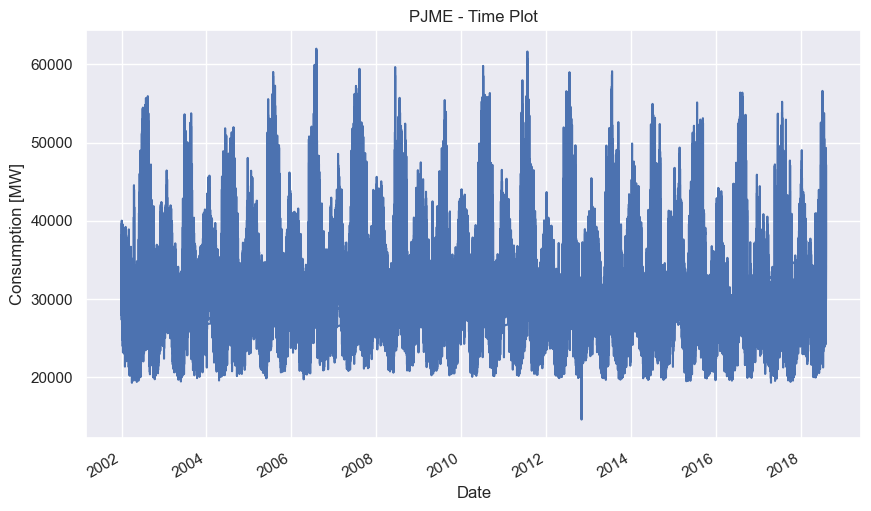

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for matplotlib
sns.set()

# Plot
plt.figure(figsize=(10, 6))
df['PJME_MW'].plot(title='PJME - Time Plot')
plt.ylabel('Consumption [MW]')
plt.xlabel('Date')

# Show the plot
plt.show()

## Seadonal Plots

In [8]:
# Defining required fields
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x:x.week)
df = df.set_index('Datetime')
df['hour'] = [x for x in df.index.hour]
df['day'] = [x for x in df.index.day_of_week]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

## Seasonal plot — Yearly consumption

In [ ]:
import numpy as np

# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()